<a href="https://colab.research.google.com/github/vivian-kim/Projects-/blob/master/Loan_Predcition_Keras_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from pickle import dump, load

%matplotlib inline

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.3

In [ ]:
from google.colab import files
uploaded = files.upload()

# df=pd.read_csv("loan_data_2.csv")

Saving loan_data 2.csv to loan_data 2.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['loan_data 2.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
#Create a model that predicts whether or not a loan will be default using the historical data.
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.3

# 1.Feature Transformation
#### Transform categorical values into numerical values (discrete)

In [ ]:
# Dtype 'object' will contain 'categorical value'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
#I want to see how many different groups are in 'purpose'
df.groupby(by="purpose", dropna=False).sum()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
purpose,,,,,,,,,,,,,
all_other,1835,272.1921,570949.41,25280.425468,25826.31,1667467,1.005059e+07,30030366,92569.42,3838,419,112,387
credit_card,1020,151.1096,403209.90,13941.604745,17793.44,895549,6.129542e+06,29253186,67643.80,1751,191,91,146
debt_consolidation,3223,500.9364,1420501.23,43182.381068,55700.56,2785219,1.793723e+07,67849534,214174.62,5783,646,279,603
educational,254,41.1282,74618.69,3618.634922,3891.31,242941,1.374948e+06,3714312,13308.80,636,54,15,69
home_improvement,512,73.9116,212018.03,7046.044589,6414.23,455903,3.272055e+06,10899788,21558.74,1221,86,42,107
major_purchase,371,49.8927,106402.47,4739.219279,4439.87,315734,1.890449e+06,3181995,14184.10,683,76,21,49
small_business,495,85.4759,268538.67,6899.507875,6681.05,445673,3.028220e+06,17072765,24803.60,1197,96,35,172


1.1 Categorical 'purpose' filed to nummerical values whilst using "get dummies"

In [ ]:
#column Purpose should be transformed to nummerical value. 
#I will be using "get dummies " to convert categorical values to nummerical values 
# and storing the returned dataFrame in a new variable df_new
df_new = pd.get_dummies(df['purpose'])

# using pd.concat to concatenate the dataframes (df_new and df)
df = pd.concat([df, df_new], axis=1).reindex(df.index)

# removing the column 'purpose' from df
# as it is of no use now.
df.drop('purpose', axis=1, inplace=True)
 
# printing df
df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


## 2. Exploratory Analaysis


In [ ]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054,0.243370,0.131760,0.413134,0.035811,0.065671,0.045625,0.064627
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676,0.429139,0.338248,0.492422,0.185829,0.247720,0.208682,0.245880
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.groupby(by='credit.policy').mean()


,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
credit.policy,,,,,,,,,,,,,,,,,,,
0,0.138680,294.367115,10.88852,13.877901,683.978051,4058.456304,29773.15257,52.934872,3.971092,0.248394,0.091006,0.277837,0.265525,0.129550,0.392934,0.047645,0.062634,0.035332,0.066381
1,0.118754,325.079200,10.94268,12.298684,717.356031,4682.468461,13798.40428,45.312677,0.997536,0.143191,0.055123,0.131518,0.238003,0.132296,0.418029,0.032944,0.066407,0.048119,0.064202


In [ ]:
#there is no missing data
df.isnull().sum()


credit.policy         0
int.rate              0
installment           0
log.annual.inc        0
dti                   0
fico                  0
days.with.cr.line     0
revol.bal             0
revol.util            0
inq.last.6mths        0
delinq.2yrs           0
pub.rec               0
not.fully.paid        0
all_other             0
credit_card           0
debt_consolidation    0
educational           0
home_improvement      0
major_purchase        0
small_business        0
dtype: int64

In [ ]:
df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


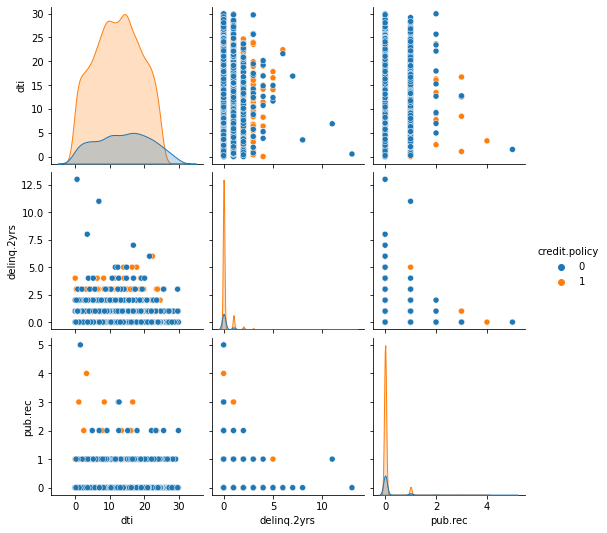

In [ ]:
import matplotlib.pyplot as plt
num_cat_risk = ['dti', 'delinq.2yrs','pub.rec','credit.policy']
sns.pairplot(df[num_cat_risk], hue="credit.policy")
plt.show()

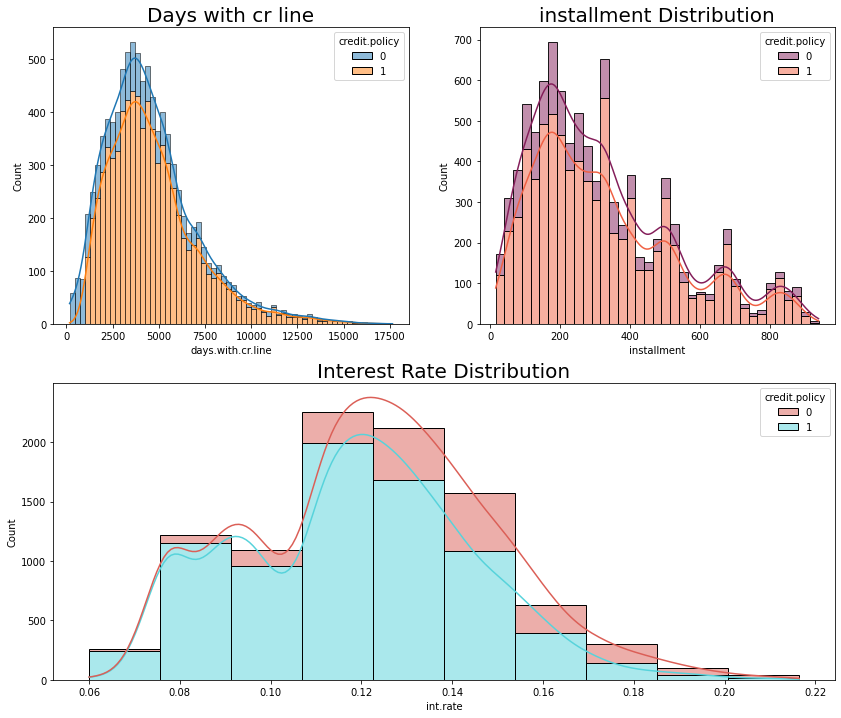

In [ ]:
plt.figure(figsize=(14, 12))

plt.subplot(221)
ax1 = sns.histplot(data=df, x='days.with.cr.line', hue='credit.policy', multiple='stack', palette='tab10', kde=True)
ax1.set_title("Days with cr line", fontsize=20)

plt.subplot(222)
ax2 = sns.histplot(data=df, x='installment', hue='credit.policy', multiple='stack', palette='rocket', kde=True)
ax2.set_title("installment Distribution", fontsize=20)

plt.subplot(212)
ax3 = sns.histplot(data=df, x='int.rate', hue='credit.policy', multiple='stack', palette='hls', kde=True, bins=10)
ax3.set_title("Interest Rate Distribution", fontsize=20)

plt.show()

## 3. Feature Engineering


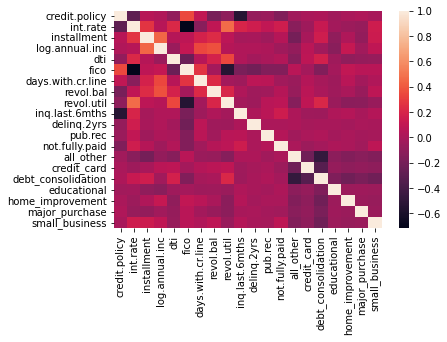

In [ ]:
#always remember your magic function if using Jupyter
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr())
plt.show()

In [ ]:
cor_matrix = df.corr().abs()
# print(cor_matrix)

In [ ]:
#Correlation matrix will be mirror image about the diagonal and all the diagonal elements will be 1. So, It does not matter that we select the upper triangular or lower triangular part of the correlation matrix but we should not include the diagonal elements.
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
# print(upper_tri)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
upper_tri

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
credit.policy,NaN,0.294089,0.05877,0.034906,0.090901,0.348319,0.099026,0.187518,0.104095,0.535511,0.076318,0.054243,0.158119,0.025412,0.003216,0.020193,0.031346,0.006036,0.024281,0.003511
int.rate,NaN,NaN,0.27614,0.056383,0.220006,0.714821,0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,0.124000,0.042109,0.123607,0.019618,0.050697,0.068978,0.151247
installment,NaN,NaN,NaN,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,0.010419,0.004368,0.032760,0.049955,0.203103,0.000774,0.161658,0.094510,0.023024,0.079836,0.145654
log.annual.inc,NaN,NaN,NaN,NaN,0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,0.033439,0.080077,0.072942,0.026214,0.119799,0.116375,0.031020,0.091540
dti,NaN,NaN,NaN,NaN,NaN,0.241191,0.060101,0.188748,0.337109,0.029189,0.021792,0.006209,0.037362,0.125825,0.084476,0.179149,0.035325,0.092788,0.077719,0.069245
fico,NaN,NaN,NaN,NaN,NaN,NaN,0.263880,0.015553,0.541289,0.185293,0.216340,0.147592,0.149666,0.067184,0.012512,0.154132,0.013012,0.097474,0.067129,0.063292
days.with.cr.line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.229344,0.024239,0.041736,0.081374,0.071826,0.029237,0.056574,0.046220,0.009318,0.042621,0.068087,0.020561,0.034883
revol.bal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.203779,0.022394,0.033243,0.031010,0.053699,0.067728,0.072316,0.005785,0.034743,0.003258,0.062395,0.083069
revol.util,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013880,0.042740,0.066717,0.082088,0.138535,0.091321,0.211869,0.053128,0.114449,0.108079,0.060962
inq.last.6mths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021245,0.072673,0.149452,0.017795,0.033640,0.044240,0.024243,0.043827,0.001445,0.042567


In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
to_drop
#fico column has a higher correlation rate with other variables. 

['fico']

In [ ]:
df1=df.drop(columns=['fico'])

In [ ]:
df1

,credit.policy,int.rate,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


#Modeling 

In [ ]:
#whether or not a loan will be a default 

import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
to_train = df[df['not.fully.paid'].isin([0,1])]
to_pred = df[df['not.fully.paid'] == 2]

X = to_train.drop('not.fully.paid', axis=1).values
y = to_train['not.fully.paid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()

model.add(
        Dense(19, activation='relu')
)

model.add(
        Dense(10, activation='relu')
)

model.add(
        Dense(5, activation='relu')
)


model.add(
        Dense(1, activation='sigmoid')
)

model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
)

early_stop = EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        verbose=1, 
        patience=25
)

model.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
27/27 [==============================] - 2s 12ms/step - loss: 0.6321 - accuracy: 0.7500 - val_loss: 0.5581 - val_accuracy: 0.8459
Epoch 2/200
27/27 [==============================] - 0s 4ms/step - loss: 0.5053 - accuracy: 0.8374 - val_loss: 0.4484 - val_accuracy: 0.8459
Epoch 3/200
27/27 [==============================] - 0s 5ms/step - loss: 0.4395 - accuracy: 0.8374 - val_loss: 0.4202 - val_accuracy: 0.8459
Epoch 4/200
27/27 [==============================] - 0s 4ms/step - loss: 0.4320 - accuracy: 0.8374 - val_loss: 0.4174 - val_accuracy: 0.8459
Epoch 5/200
27/27 [==============================] - 0s 4ms/step - loss: 0.4285 - accuracy: 0.8374 - val_loss: 0.4154 - val_accuracy: 0.8459
Epoch 6/200
27/27 [==============================] - 0s 5ms/step - loss: 0.4260 - accuracy: 0.8374 - val_loss: 0.4138 - val_accuracy: 0.8459
Epoch 7/200
27/27 [==============================] - 0s 4ms/step - loss: 0.4241 - accuracy: 0.8374 - val_loss: 0.4127 - val_accuracy: 0.8459
Epoch 8/200


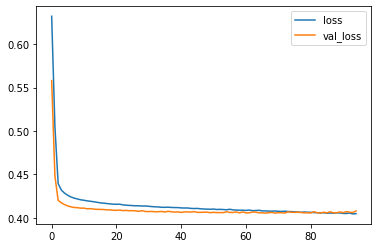

In [ ]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

In [ ]:
predictions = model.predict(X_test)

predictions
# print(confusion_matrix(y_test,predictions), classification_report(y_test,predictions))

array([[0.16672876],
       [0.19962761],
       [0.04030016],
       ...,
       [0.18663764],
       [0.34395722],
       [0.05239591]], dtype=float32)

In [ ]:
model_new = Sequential()

model_new.add(
        Dense(19, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(10, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(5, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(1, activation='sigmoid')
)

model_new.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['binary_accuracy']
)


model_new.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
27/27 [==============================] - 1s 12ms/step - loss: 0.6225 - binary_accuracy: 0.7540 - val_loss: 0.5576 - val_binary_accuracy: 0.8459
Epoch 2/200
27/27 [==============================] - 0s 5ms/step - loss: 0.5347 - binary_accuracy: 0.8223 - val_loss: 0.4638 - val_binary_accuracy: 0.8459
Epoch 3/200
27/27 [==============================] - 0s 6ms/step - loss: 0.4933 - binary_accuracy: 0.8328 - val_loss: 0.4313 - val_binary_accuracy: 0.8459
Epoch 4/200
27/27 [==============================] - 0s 5ms/step - loss: 0.4860 - binary_accuracy: 0.8353 - val_loss: 0.4273 - val_binary_accuracy: 0.8459
Epoch 5/200
27/27 [==============================] - 0s 5ms/step - loss: 0.4811 - binary_accuracy: 0.8368 - val_loss: 0.4265 - val_binary_accuracy: 0.8459
Epoch 6/200
27/27 [==============================] - 0s 5ms/step - loss: 0.4781 - binary_accuracy: 0.8373 - val_loss: 0.4224 - val_binary_accuracy: 0.8459
Epoch 7/200
27/27 [==============================] - 0s 5ms/step - lo

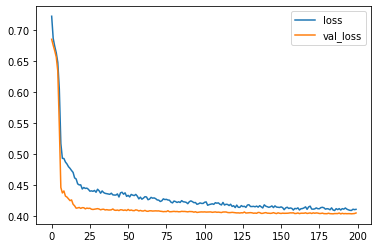

In [ ]:
pd.DataFrame(model_new.history.history)[['loss','val_loss']].plot() 

In [ ]:

predictions_new = (model_new.predict(X_test) >= 0.2).astype('int')

print(
        confusion_matrix(y_test,predictions_new), 
        '\n', 
        classification_report(y_test,predictions_new)
)

[[1784  647]
 [ 234  209]] 
               precision    recall  f1-score   support

           0       0.88      0.73      0.80      2431
           1       0.24      0.47      0.32       443

    accuracy                           0.69      2874
   macro avg       0.56      0.60      0.56      2874
weighted avg       0.79      0.69      0.73      2874




credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

 


Tasks:

1.     Feature Transformation

Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors of the dataset.

3.     Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

4.     Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend